# **Title - Crop Recommendation System using Machine Learning**

##  Name - Manish Vankudre (YBI Internship - 17 Jan 2022 )





<p><img style="float: right;margin:5px 20px 5px 1px; max-width:800px ;max-height:1200px" src="https://www.day1tech.com/wp-content/uploads/2021/06/Image-Crop-Recommendation@1x-1.png"></p>

-------------

## **Objective**

To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation.

## **Data Source**


This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.

COPYRIGHT: Indian Chamber of Food and Agriculture https://www.icfa.org.in/

Kaggle Dataset : https://www.kaggle.com/siddharthss/crop-recommendation-dataset

Dataset  Download URL : https://www.kaggle.com/siddharthss/crop-recommendation-dataset/download

**DATA FIELDS:-**

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm





## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
import io
from ipywidgets import interact

## **Import Data**

In [3]:
"""
from google.colab import files  

print("Please upload the dataset file = 'Crop_recommendation.csv' ")
uploaded = files.upload()
"""

'\nfrom google.colab import files  \n\nprint("Please upload the dataset file = \'Crop_recommendation.csv\' ")\nuploaded = files.upload()\n'

In [6]:
#df = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **Describe Data**

In [7]:
print("The Shape of the Dataset is: {}" .format(df.shape))
print("The number of the columns in the Dataset is: {}" .format(df.shape[1]))
print("The Shape of the row in the Dataset is: {}" .format(df.shape[0]))

The Shape of the Dataset is: (2200, 8)
The number of the columns in the Dataset is: 8
The Shape of the row in the Dataset is: 2200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [12]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average",conditions.title(),"= {0:.2f}\n".format(df[conditions].mean()))
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("-------------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

## **Data Visualization**

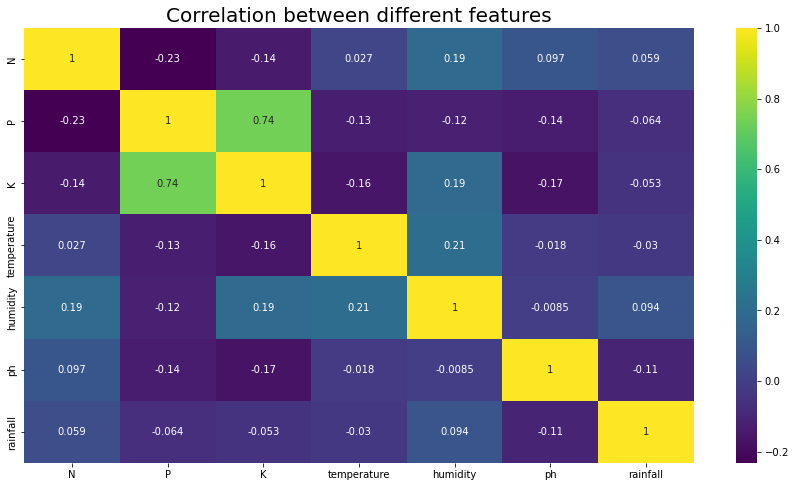

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

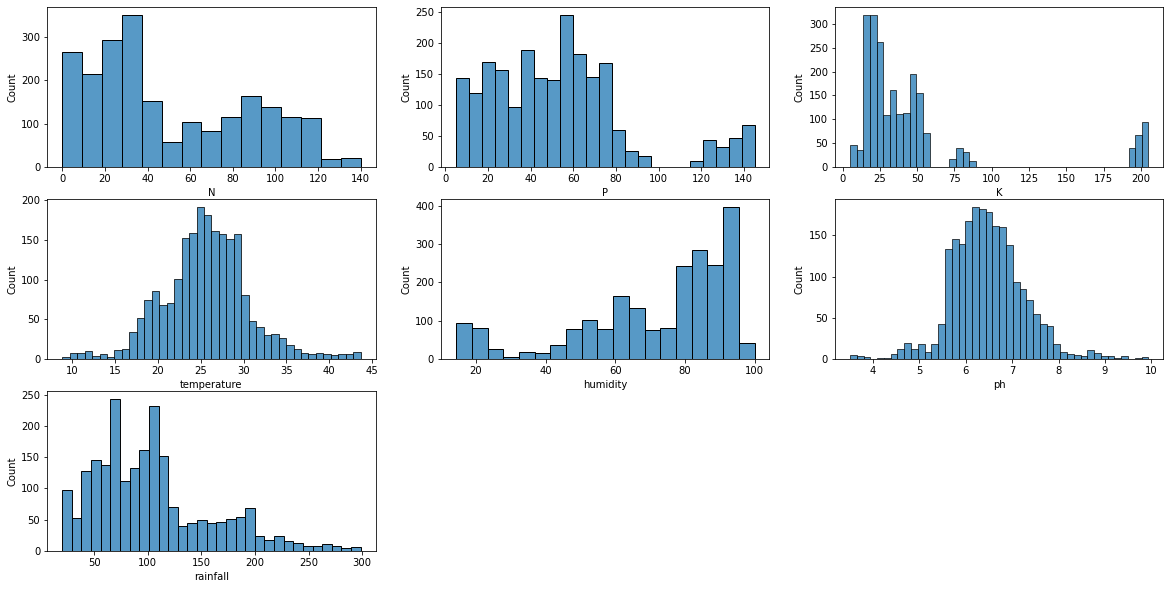

In [14]:
plt.figure(figsize=(20,10))
i = 1
for column in df.columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

## **Define Target Variable (y) and Feature Variables (X)**

In [15]:
x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [16]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


## **Train Test Split**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =42)

In [18]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## **Modeling**

In [19]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

## **Model Evaluation**

In [20]:
predicted_values = knn.predict(x_test)

## **Prediction**

In [21]:
x = metrics.accuracy_score(y_test, predicted_values)

print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9606060606060606
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.89      0.96      0.93        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      0.97      0.97        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.79      0.97      0.87        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.81      1.00      0.90        22
       maize       1.00      0.96      0.98        26
       mango       0.91      1.00      0.96        32
   mothbeans       1.00      0.85      0.92        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      0.96      0.98 

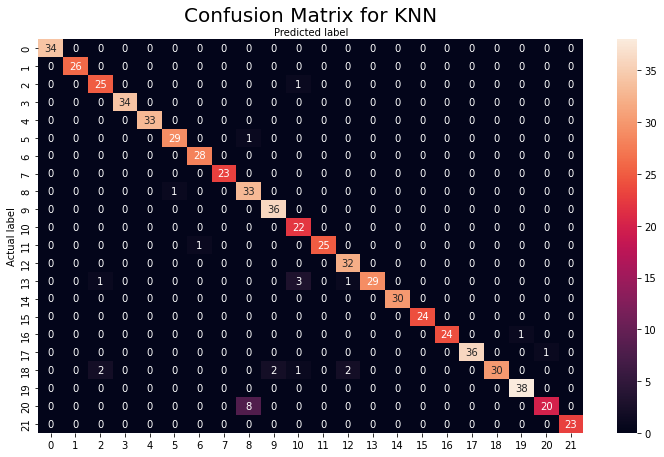

In [22]:
class_names = np.arange(0,21)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,predicted_values)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for KNN', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
@interact
def values(N=(0,250), 
           P=(0,250),
           K=(0,250), 
           Temperature=(0,50),
           ph=(0,14), 
           Humidity=(0,100),
           Rainfall=(0,3000)):
  lt=[]
  lt.extend([N,P,K,Temperature,ph,Humidity,Rainfall])

  prediction = knn.predict((np.array([lt])))
  print("The suggested Crop for Given Climatic condition is :", prediction[0])  
  return None



interactive(children=(IntSlider(value=125, description='N', max=250), IntSlider(value=125, description='P', ma…

## **Explaination**

Precision agriculture is currently popular. Precision agriculture is a modern farming technique that uses data from soil characteristics, soil types, crop yield data, and weather conditions to recommend the best crop to farmers for maximum yield and profit. This technique can help farmers make more informed decisions about their farming strategy by reducing crop failures.

To alleviate the agricultural crisis in the current state of affairs, better recommendation systems are required to assist farmers in making informed decisions before beginning crop cultivation.

The data used in this project was created by augmenting and combining various publicly available datasets from India, such as weather, soil, and so on. The dataset is available here. In comparison to the complicated features affecting crop yield, this data is relatively simple, with very few but useful features.

The soil's nitrogen, phosphorus, potassium, and pH values are included in the data. It also includes the humidity, temperature, and rainfall requirements for a specific crop.
